In [1]:
# 1. IMPORTS

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

In [2]:
# 2. LOAD DATA

df = pd.read_csv("ufc-master.csv")

In [35]:
# 3. DATASET OVERVIEW

print("Shape:", df.shape)   # Print the number of rows and columns in the dataset
print("\nColumns:")
print(df.columns)           # Print all column names
print("\nData types:")
print(df.dtypes)            # Print the data type of each column
print("\nFirst rows:")
print(df.head())            # Display the first 5 rows of the dataset

Shape: (6528, 120)

Columns:
Index(['RedFighter', 'BlueFighter', 'RedOdds', 'BlueOdds', 'RedExpectedValue',
       'BlueExpectedValue', 'Date', 'Location', 'Country', 'Winner',
       ...
       'FinishRoundTime', 'TotalFightTimeSecs', 'RedDecOdds', 'BlueDecOdds',
       'RSubOdds', 'BSubOdds', 'RKOOdds', 'BKOOdds', 'WinnerNumeric',
       'FavoriteWin'],
      dtype='object', length=120)

Data types:
RedFighter           object
BlueFighter          object
RedOdds             float64
BlueOdds            float64
RedExpectedValue    float64
                     ...   
BSubOdds            float64
RKOOdds             float64
BKOOdds             float64
WinnerNumeric         int64
FavoriteWin           int64
Length: 120, dtype: object

First rows:
          RedFighter        BlueFighter  RedOdds  BlueOdds  RedExpectedValue  \
0  Alexandre Pantoja        Kai Asakura   -250.0     215.0           40.0000   
1  Shavkat Rakhmonov  Ian Machado Garry   -210.0     295.0           47.6190   
2      

In [5]:
# 4. Describtion of all columns

print("\nDescribtion:\n")
print(df.describe(include="all"))


Describtion:

        RedFighter  BlueFighter      RedOdds     BlueOdds  RedExpectedValue  \
count         6528         6528  6301.000000  6302.000000       6301.000000   
unique        1661         1922          NaN          NaN               NaN   
top     Jim Miller  Angela Hill          NaN          NaN               NaN   
freq            29           18          NaN          NaN               NaN   
mean           NaN          NaN  -115.711474    59.793240         96.658224   
std            NaN          NaN   277.225783   253.117416         85.891109   
min            NaN          NaN -2100.000000 -1200.000000          4.761900   
25%            NaN          NaN  -255.000000  -150.000000         39.215700   
50%            NaN          NaN  -150.000000   130.000000         66.666700   
75%            NaN          NaN   130.000000   215.000000        130.000000   
max            NaN          NaN   775.000000  1300.000000        775.000000   

        BlueExpectedValue        Dat

In [37]:
# 5. MISSING VALUES

print("\nMissing values:")
print(df.isnull().sum()[df.isnull().sum() > 0])
# Show columns that contain missing values and the number of NaNs in each


Missing values:
RedOdds                   227
BlueOdds                  226
RedExpectedValue          227
BlueExpectedValue         226
BlueAvgSigStrLanded       930
BlueAvgSigStrPct          765
BlueAvgSubAtt             832
BlueAvgTDLanded           833
BlueAvgTDPct              842
BlueStance                  3
RedAvgSigStrLanded        455
RedAvgSigStrPct           357
RedAvgSubAtt              357
RedAvgTDLanded            357
RedAvgTDPct               367
EmptyArena               1486
BMatchWCRank             5328
RMatchWCRank             4749
RWFlyweightRank          6432
RWFeatherweightRank      6519
RWStrawweightRank        6382
RWBantamweightRank       6374
RHeavyweightRank         6342
RLightHeavyweightRank    6344
RMiddleweightRank        6346
RWelterweightRank        6337
RLightweightRank         6344
RFeatherweightRank       6351
RBantamweightRank        6347
RFlyweightRank           6340
RPFPRank                 6275
BWFlyweightRank          6455
BWFeatherweightRank    


Winner distribution:
Winner
Red     3787
Blue    2741
Name: count, dtype: int64


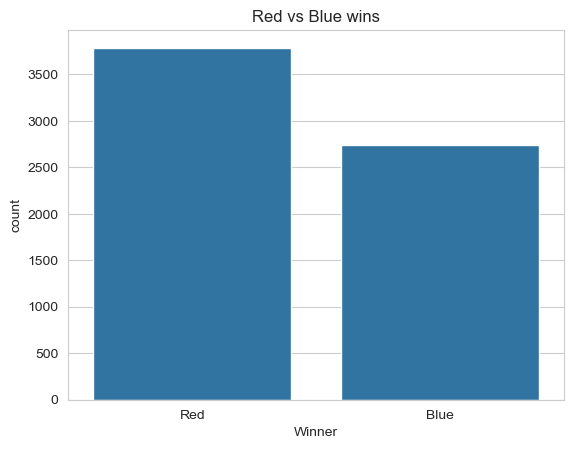

In [39]:
# 6. TARGET VARIABLE (Winner)

print("\nWinner distribution:")
print(df["Winner"].value_counts())  
# Count the number of wins for each class (Red / Blue)

sns.countplot(data=df, x="Winner")  
# Plot the distribution of the target variable

plt.title("Red vs Blue wins")
plt.show()


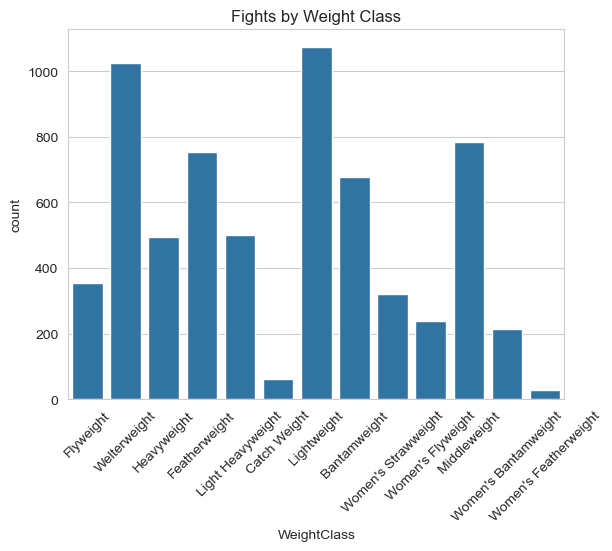

In [47]:
# 7. WEIGHT CLASS ANALYSIS

sns.countplot(data=df, x="WeightClass")  
# Plot number of fights per weight class

plt.title("Fights by Weight Class")
plt.xticks(rotation=45)  # Rotate labels to avoid overlap
plt.show()

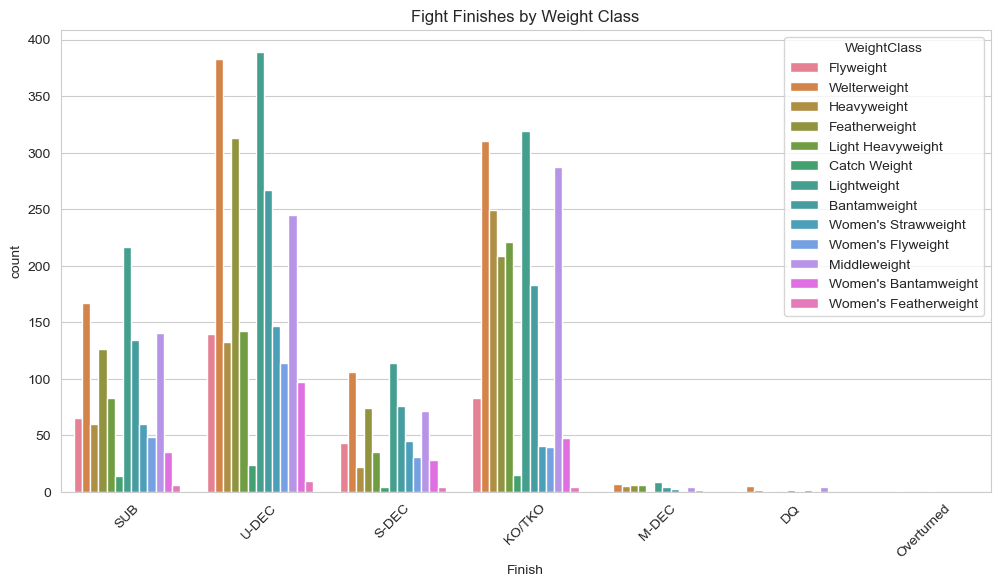

In [45]:
# 8. FIGHT OUTCOMES

finish_counts = df['Finish'].value_counts()  
# Count how many fights ended with each type of finish

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Finish', hue='WeightClass')  
# Plot fight finishes by type, grouped by weight class

plt.title('Fight Finishes by Weight Class')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.show()


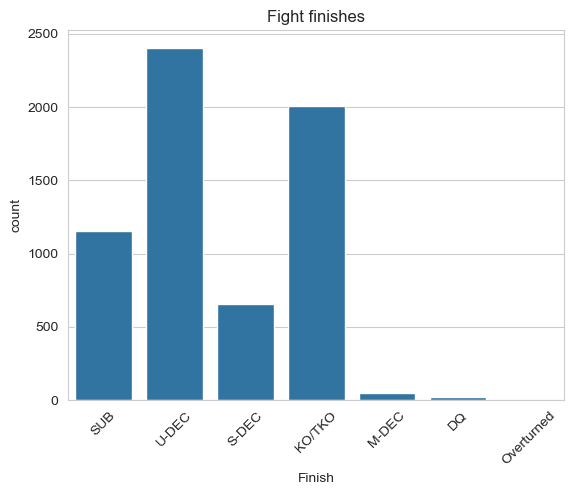

In [21]:
# 9. FIGHT OUTCOMES

sns.countplot(data=df, x="Finish")
plt.title("Fight finishes")
plt.xticks(rotation=45)
plt.show()

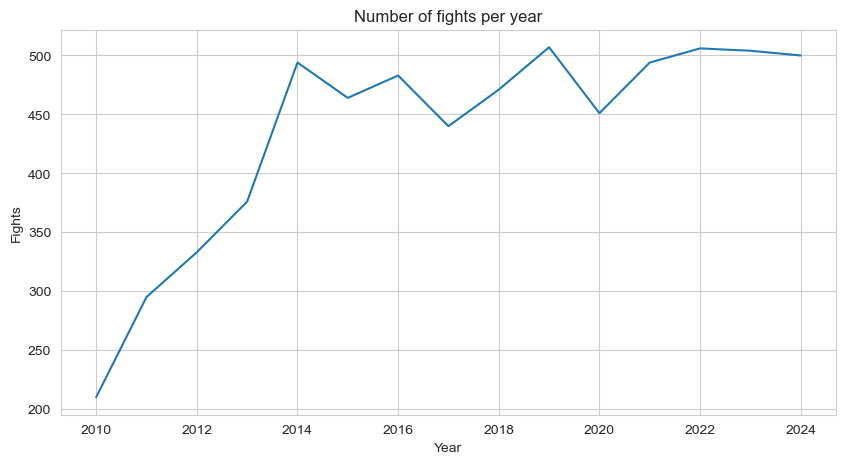


=== END OF EDA ===


In [45]:
#10. TRENDS OVER TIME

df["Date"] = pd.to_datetime(df["Date"])  # Convert 'Date' to datetime type
df["Year"] = df["Date"].dt.year         # Extract year from date

df.groupby("Year")["Winner"].count().plot(figsize=(10,5))  
# Count number of fights per year and plot

plt.title("Number of fights per year")
plt.ylabel("Fights")
plt.show()

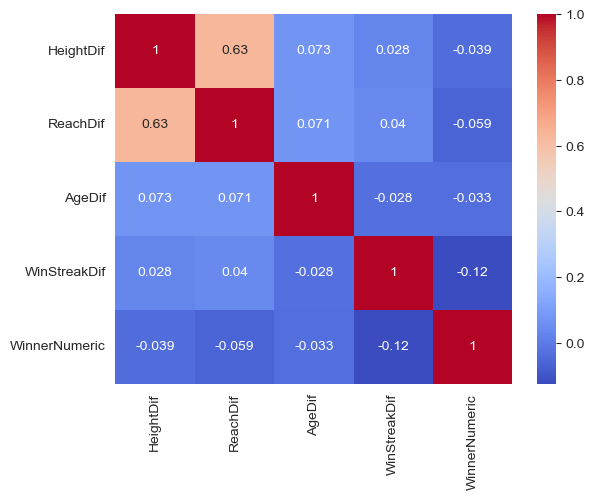

In [49]:
# 11. CORRELATION BETWEEN NUMERICAL FEATURES AND WINNER

# Create a numeric column for Winner
df['WinnerNumeric'] = df['Winner'].map({'Red': 1, 'Blue': 0})

# Now calculate the correlation
corr_features = ['HeightDif','ReachDif','AgeDif','WinStreakDif','WinnerNumeric']
sns.heatmap(df[corr_features].corr(), annot=True, cmap='coolwarm')
plt.show()


In [51]:
# 12. FAVORITE WIN ANALYSIS

# Determine the favorite
def favorite_wins(row):
    if row['RedOdds'] < row['BlueOdds'] and row['Winner'] == 'Red':
        return 1  # The favorite won
    elif row['BlueOdds'] < row['RedOdds'] and row['Winner'] == 'Blue':
        return 1 # Favorite won
    else:
        return 0  # Underdog won


df['FavoriteWin'] = df.apply(favorite_wins, axis=1)

# Favorite win percentage
favorite_win_pct = df['FavoriteWin'].mean() * 100
print(f"The favorite wins on average {favorite_win_pct:.2f}% of fights")


print("\n=== END OF EDA ===")

The favorite wins on average 62.67% of fights

=== END OF EDA ===
